In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,arange,array

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

Compute the following line integral 
 $$\int_C (x-y)\,dx + xy\,dy$$ where $C$ is the clockwise section of the circle $x^2 + y^2 = 1$ from $(1,0)$ to $(0,1)$. 

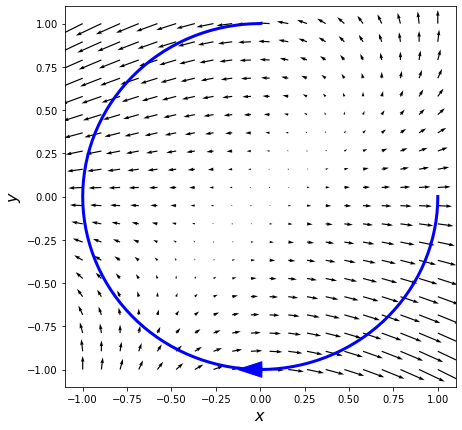

In [8]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x-y,x*y);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-1,-.001,0,width=.03,color='b')
plt.plot(cos(t*3*pi/2),-sin(t*3*pi/2),'b',lw=3);

$\vec r(t) = \langle \cos(t), -\sin(t) \rangle $ for $ 0 \leq t \leq 3\pi/2$.

$$\int_0^{3\pi/2} (\cos t + \sin t)(-\sin t) + (\cos t)(-\sin t)(- \cos t )dt  $$

## Work example

A wagon 5 m away is pulled by a rope from a height 1 m above it with a force of 7 N. How much work is done pulling it the full distance?
<!--![Picture of wagon pulled by rope](wagon.png) -->

In [9]:
@interact(xpos=(0.,5.))
def _(xpos=0):
    fig = plt.figure(figsize = (7.5,3))
    ax = fig.gca()
    ax.plot([0+xpos,5],[0,1],'k')
    ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
    for xx in (-5/3,-1/3):
        ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='k',alpha=1))
    ax.set_ylim([-1,2])
    ax.set_xlim([-2.5,5])
    ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
    for xi in np.arange(0,xpos,1/2):
        ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);

interactive(children=(FloatSlider(value=0.0, description='xpos', max=5.0), Output()), _dom_classes=('widget-in…

# The Fundamental Theorem of Line integrals

Let $C$ be a piecewise-smooth, oriented curve from point $(x_1,y_1)$ to point $(x_2,y_2)$ and $\vec F$ a continuous conservative vector field with potential $f$. (That is, $\nabla f = \vec F$.)  Then, $$\int_C \nabla f\cdot d\vec r = f(x_2,y_2) - f(x_1,y_1).$$

In [10]:
@interact
def _(s = (0,1,.05),r = fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2]))):
    t = np.linspace(0,1,100)
    plt.plot(*r(t),'-r')
    plt.text(-.7,.45,"$C$",fontsize=30,color='r');
    u = np.linspace(-1.2,1.3,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    plt.quiver(x,y,2*x,y/2,alpha = (1 - .8*s));
    u = np.linspace(-1.2,1.3,55) 
    v = np.linspace(-1,2,55)
    x,y = np.meshgrid(u,v)
    plt.contour(x,y,x**2 + y**2/4,alpha=s,levels=arange(.25,3,3/8))


interactive(children=(FloatSlider(value=0.0, description='s', max=1.0, step=0.05), Output()), _dom_classes=('w…

## Example

Compute $\int_C \vec F\cdot d\vec r$ where $C$ is the curve $\langle (1+t/4)\cos(4\pi t),2t - \frac12\sin(8 t) \rangle$ for $t\in [0,1]$ and $$\vec F(x,y) = \left\langle 2x,\frac{y}{2} \right\rangle.$$

In [11]:
r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
f = lambda x,y: x**2 + y**2/4
t = np.linspace(0,1,100)

@interact(angle=(-108,66,6),s=(0.,1,.05),)
def _(angle=-24,vangle=(0,90,6),s=0,
     r=fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])),
     r2=fixed(lambda t: np.array([(1-t)+5/4 * t,(t)*(2 - sin(8)/2)])),
     f=fixed(lambda x,y: x**2 + y**2/4),
     t=fixed(np.linspace(0,1,100))):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121,projection='3d')
    u = np.linspace(-1.2,1.25,100) 
    v = np.linspace(-1,2,100) 
    w = np.linspace(0,1,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    A = np.array([1,0])
    B = np.array([5/4,2-sin(8)])
    ax.plot_surface(*((1-s)*r(w) + s*r2(w)),z*f(*((1-s)*r(w) + s*r2(w))),color='r')
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)


    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax2= fig.add_subplot(122)

    ax2.plot(*r(t),'-r',alpha=.4)
    ax2.plot(*((1-s)*r(t) + s*r2(t)),'-r')
    ax2.text(-.7,.45,"$C$");
    u = np.linspace(-1.2,1.2,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    plt.quiver(x,y,2*x,y/2);

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

## Theorem

The following statements are equivalent regarding a continuous vector field $\vec F$.

  - $\vec F$ is conservative.
  - $\oint_C \vec F\cdot d\vec r = 0$ on every closed curve $C$.
  - $\int_C \vec F\cdot d\vec r$ depends only on the endpoints of $C$, i.e., is path-independent.

### Example

Recall that for a vector field of the form $\vec F(x,y) = \langle P(x,y),Q(x,y) \rangle$, we have

$$\int_C\vec F\cdot d\vec r = \int_C P\,dx + Q\,dy.$$

For each line integral below, identify the vector field associated with it and determine if it is conservative. 

  - $\displaystyle \int_C x^2\, dx - y\,dy$
  - $\displaystyle \int_C dx - dy$
  - $\displaystyle \int_C x^2\, dy - y\,dx$
  - $\displaystyle \int_C f(x)\, dx +g(y)\,dy$


### Examples

  1. Compute $\int_C x\,dx + y\,dy$ where $C$ is:
    1. the parabola $y = \frac49 x^2$ from $(0,0)$ to $(3,4)$.
    2. any circle.

  2. A 160-lb man carries a 25-lb can of paint up a helical staircase that encircles a silo with a radius of 20-ft. If the silo is 90 ft high and the man makes exactly three complete revolutions climbing to the top, how much work is done by the man against gravity? 

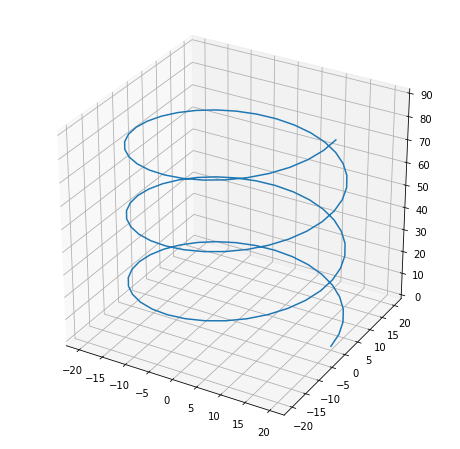

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
t = linspace(0,6*pi,100)
ax.plot(20*cos(t),20*sin(t),90/(6*pi)*t);

  3. Suppose there is a hole in the can of paint in the exercise above and 9 lbs of paint leaks steadily out of the can during the man's ascent. How much work is done?	 
 

  4. Compute the line integral $$\int_C (x^2 - xy)dx + (y-2)dy$$ where $C$ is the polygonal path from $(2,0)$ to $(0,0)$ to $(2,1)$ to $(0,1)$.

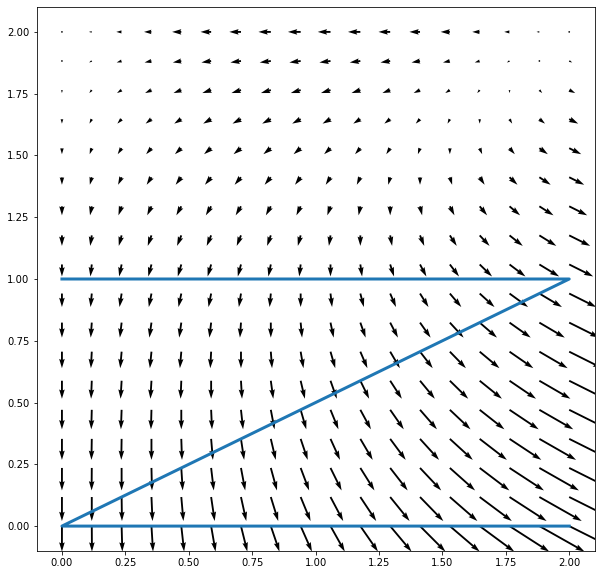

In [28]:
x =y = linspace(0,2,18)
x,y = meshgrid(x,y)
plt.quiver(x,y,x**2 - x*y,y-2)
plt.plot([2,0,2,0],[0,0,1,1],lw=3);

#### Conservation of Energy

$$ f(\vec r(a)) + \frac12m|\vec v(a)|^2 =  f(\vec r(b)) + \frac12m|\vec v(b)|^2 $$

### Example

How fast do you have to throw a baseball straight up to reach the end of the universe?

In [31]:
G = 6.67408e-11
M = 5.972e24
R = 6.3781e6
m = .145

## Preview of next time

Let $\mathcal{R}$ be the rectangular region $[a,b]\times [c,d]$. Let $C$ be its counter-clockwise oriented boundary. Compute 

$$\oint_C x\,\vec j\cdot d\vec r$$

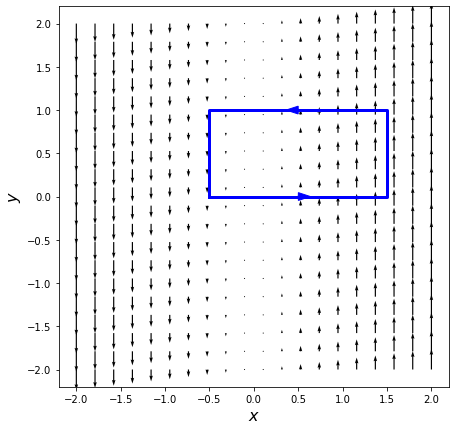

In [7]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot([-1/2,3/2,3/2,-1/2,-1/2],[0,0,1,1,0],'b',lw=3);
plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);